In [928]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [929]:
df = pd.read_csv('Downloads/Titanic dataset/train.csv')
df_test = pd.read_csv('Downloads/Titanic dataset/test.csv')





In [930]:
df.head()
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [931]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [932]:
df.shape

(891, 12)

In [933]:
##since most of cabin is null we can drop the column
##since there are are only two embarked null then we can drop those rows

df = df.drop(columns = 'Cabin')
df_test = df_test.drop(columns = 'Cabin')

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [934]:
df['Age'] = df.Age.fillna(df.Age.mean())
#df_test['Age'] = df_test.Age.fillna(df_test.Age.mean())


#df_test = df_test.dropna()
df = df.dropna()

In [935]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [936]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [937]:
### OUTLIERS
## need to to fix the Age
df['Age'].unique()


array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [938]:
##since the older ages looks reasonable then we don't have to get rid of the upper limits
upper_lim = df['Age'].quantile(.95)
lower_lim = df['Age'].quantile(.05)

df = df[(df['Age'] > lower_lim)]


#df_test = df_test[(df_test['Age'] > lower_lim)]

In [939]:
df['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        , 27.        , 14.        , 58.        , 20.        ,
       39.        , 55.        , 31.        , 34.        , 15.        ,
       28.        ,  8.        , 19.        , 40.        , 66.        ,
       42.        , 21.        , 18.        ,  7.        , 49.        ,
       29.        , 65.        , 28.5       , 11.        , 45.        ,
       17.        , 32.        , 16.        , 25.        , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        , 61.        , 56.        ,
       50.        , 36.        , 45.5       , 20.5       , 62.        ,
       41.        , 52.        , 63.        , 23.5       , 43.        ,
       60.        , 10.        , 64.        , 13.        , 48.  

In [940]:
df.Fare.round().unique()

array([  7.,  71.,   8.,  53.,  52.,  11.,  30.,  27.,  31.,  16.,  13.,
        18.,  26.,  36.,  21., 263.,  28., 147.,  10.,  82.,   9.,  22.,
        40.,  77.,  62.,  47.,  83.,  15.,  74.,  14.,  56.,  12.,  34.,
        61.,  35.,  63.,  23.,  24., 248.,  79.,  37.,  67.,  70.,  55.,
        25.,  29.,   0.,  50.,   6.,  19., 113.,  76.,  90.,  20.,  86.,
       512.,  80., 153., 136.,  78.,  91., 111., 109.,  57., 262., 165.,
       134.,  58.,  75.,  69., 212.,   4., 228., 120.,  17.,  32.,  89.,
        38., 152.,  59.,  94., 222., 106.,  51.,  33.,  42.,  65.,  39.,
       211.,   5.])

In [941]:
upper_lim = df['Fare'].quantile(.99)
lower_lim = df['Fare'].quantile(.01)

df = df[(df['Fare'] > lower_lim) & (df['Fare'] < upper_lim)]
#df_test = df_test[(df_test['Fare'] > lower_lim) & (df_test['Fare'] < upper_lim)]

df.Fare.round().unique()

array([  7.,  71.,   8.,  53.,  52.,  11.,  30.,  27.,  31.,  16.,  13.,
        18.,  26.,  36.,  21.,  28., 147.,  10.,  82.,   9.,  22.,  40.,
        77.,  62.,  47.,  83.,  15.,  74.,  14.,  56.,  12.,  34.,  61.,
        35.,  63.,  23.,  24., 248.,  79.,  37.,  67.,  70.,  55.,  25.,
        29.,  50.,   6.,  19., 113.,  76.,  90.,  20.,  86.,  80., 153.,
       136.,  78.,  91., 111., 109.,  57., 165., 134.,  58.,  75.,  69.,
       212.,   4., 228., 120.,  17.,  32.,  89.,  38., 152.,  59.,  94.,
       222., 106.,  51.,  33.,  42.,  65.,  39., 211.,   5.])

In [942]:
df = df.drop(columns = 'Ticket')
df_test = df_test.drop(columns = 'Ticket')

In [943]:
##get dummy variables for embarked and sex
df_embarked = pd.get_dummies(df['Embarked'])
df = df.join(df_embarked).drop('Embarked', axis=1)

df_sex = pd.get_dummies(df['Sex'])
df = df.join(df_sex).drop('Sex', axis=1)

df_embarked_test = pd.get_dummies(df_test['Embarked'])
df_test = df_test.join(df_embarked_test).drop('Embarked', axis=1)

df_sex_test = pd.get_dummies(df_test['Sex'])
df_test = df_test.join(df_sex_test).drop('Sex', axis=1)

In [944]:
##Drop the name because its not useful
df = df.drop(columns = 'Name')
df_test = df_test.drop(columns = 'Name')
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [945]:
df = df.drop(columns = 'male')
df = df.drop(columns = 'PassengerId')

df_test = df_test.drop(columns = 'male')
df_test = df_test.drop(columns = 'PassengerId')

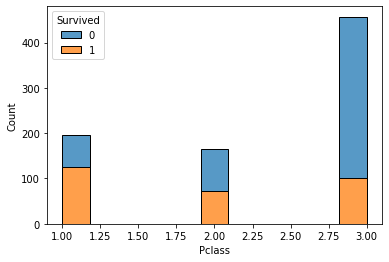

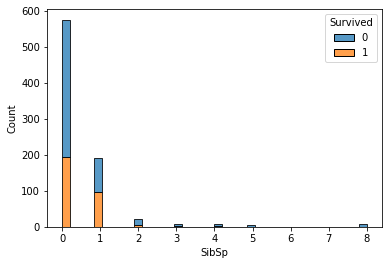

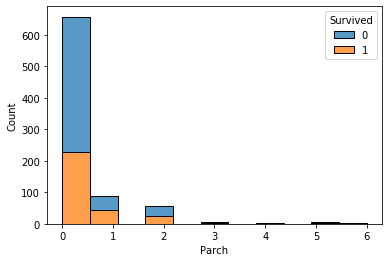

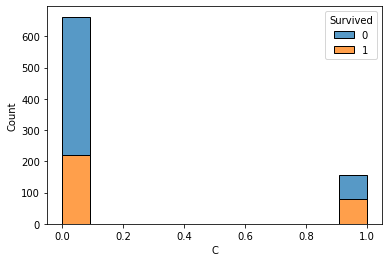

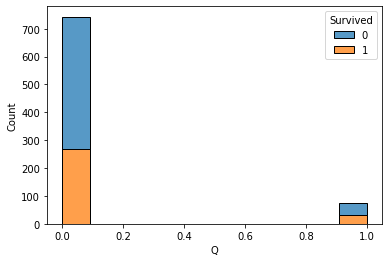

ValueError: Could not interpret value `Sfemale` for parameter `x`

<Figure size 432x288 with 0 Axes>

In [946]:
#####Visualization ########

for i in ['Pclass','SibSp', 'Parch', 'C', 'Q', 'S' 'female']:
    fig = plt.figure()
    sns.histplot(data=df, x= i , hue = 'Survived', multiple = 'stack')
    plt.show()

In [ ]:
df_test = df_test.fillna(0)
x_test = df_test
y_test = pd.read_csv('Downloads/Titanic dataset/gender_submission.csv')
y_test = y_test.drop(columns = 'PassengerId')


x_train = df.drop(columns = 'Survived')
y_train = df['Survived']

In [ ]:
y_test.shape

In [ ]:
x_test.shape

In [ ]:
## Create the train test split
X = df.drop(columns = 'Survived')
Y = df.Survived

from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)






In [ ]:
###modeling
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(x_train, y_train)
logReg.predict(x_test[0:10])

In [ ]:
score = logReg.score(x_test, y_test)
print(score)

In [ ]:
###knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores[k]= metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
print(scores) ## We can see that we have a better prediction using logistic regression

In [947]:
##naive bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

mnb = MultinomialNB(class_prior=[.25,.75])
mnb.fit(x_train,y_train)
mnb.class_prior
y_pred = mnb.predict(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix.diagonal().sum()/conf_matrix.sum()

MultinomialNB(class_prior=[0.25, 0.75])

[0.25, 0.75]

0.5669856459330144

In [948]:
## The logistic regression model gives us the best accuracy

In [949]:
##Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(x_train[0:350], y_train[0:350])
rf_predictions = model.predict(x_test[0:350])
rf_probs = model.predict_proba(x_test[0:350])[:, 1]
from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(y_test[0:350], rf_probs)
roc_value

RandomForestClassifier(max_features='sqrt')

0.9364294890094204

In [694]:
## The Random Forest model gives us the best accuracy